In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = "../Data/Folkhalsomyndigheten_Covid19.xlsx"
covid_each_region = pd.read_excel(file_path, sheet_name='Totalt antal per region')

dict = {
    "info": covid_each_region.info(),
    "head": covid_each_region.head(10),
    "dec": covid_each_region.describe(include='all'),
    "col": covid_each_region.columns,
    "index": covid_each_region.index
}
dict

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        21 non-null     object 
 1   Totalt_antal_fall             21 non-null     int64  
 2   Fall_per_100000_inv           21 non-null     float64
 3   Totalt_antal_intensivvårdade  21 non-null     int64  
 4   Totalt_antal_avlidna          21 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 972.0+ bytes


{'info': None,
 'head':                 Region  Totalt_antal_fall  Fall_per_100000_inv  \
 0             Blekinge              30829         19371.449951   
 1              Dalarna              75091         26098.780273   
 2              Gotland              11874         19776.671875   
 3            Gävleborg              74803         26020.503418   
 4              Halland             108822         32349.047119   
 5  Jämtland Härjedalen              34347         26197.373535   
 6            Jönköping              89662         24583.161133   
 7               Kalmar              62810         25537.878418   
 8            Kronoberg              51460         25460.141602   
 9           Norrbotten              50755         20327.326904   
 
    Totalt_antal_intensivvårdade  Totalt_antal_avlidna  
 0                            85                   184  
 1                           260                   544  
 2                            46                    82  
 3        

In [3]:
covid_each_region['Death_Rate'] = covid_each_region['Totalt_antal_avlidna'] / covid_each_region['Totalt_antal_fall']

covid_each_region['Sickness_Rate'] = covid_each_region['Fall_per_100000_inv'] / 100000

covid_each_region['Death_Percentage_of_Sickness_Rate'] = (covid_each_region['Totalt_antal_avlidna'] / covid_each_region['Fall_per_100000_inv']) * 100

highest_death_rate_region = covid_each_region.loc[covid_each_region['Death_Rate'].idxmax()]
highest_sickness_rate_region = covid_each_region.loc[covid_each_region['Sickness_Rate'].idxmax()]

highest_death_rate_region, highest_sickness_rate_region


(Region                               Västernorrland
 Totalt_antal_fall                             56224
 Fall_per_100000_inv                    22976.456543
 Totalt_antal_intensivvårdade                    217
 Totalt_antal_avlidna                            678
 Death_Rate                                 0.012059
 Sickness_Rate                              0.229765
 Death_Percentage_of_Sickness_Rate          2.950847
 Name: 16, dtype: object,
 Region                                     Örebro
 Totalt_antal_fall                           98929
 Fall_per_100000_inv                  32379.776855
 Totalt_antal_intensivvårdade                  276
 Totalt_antal_avlidna                          525
 Death_Rate                               0.005307
 Sickness_Rate                            0.323798
 Death_Percentage_of_Sickness_Rate        1.621382
 Name: 19, dtype: object)

C:\Users\Kevin\AppData\Local\Temp\ipykernel_17400\270722463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Death_Rate', data=covid_each_region, palette="coolwarm")


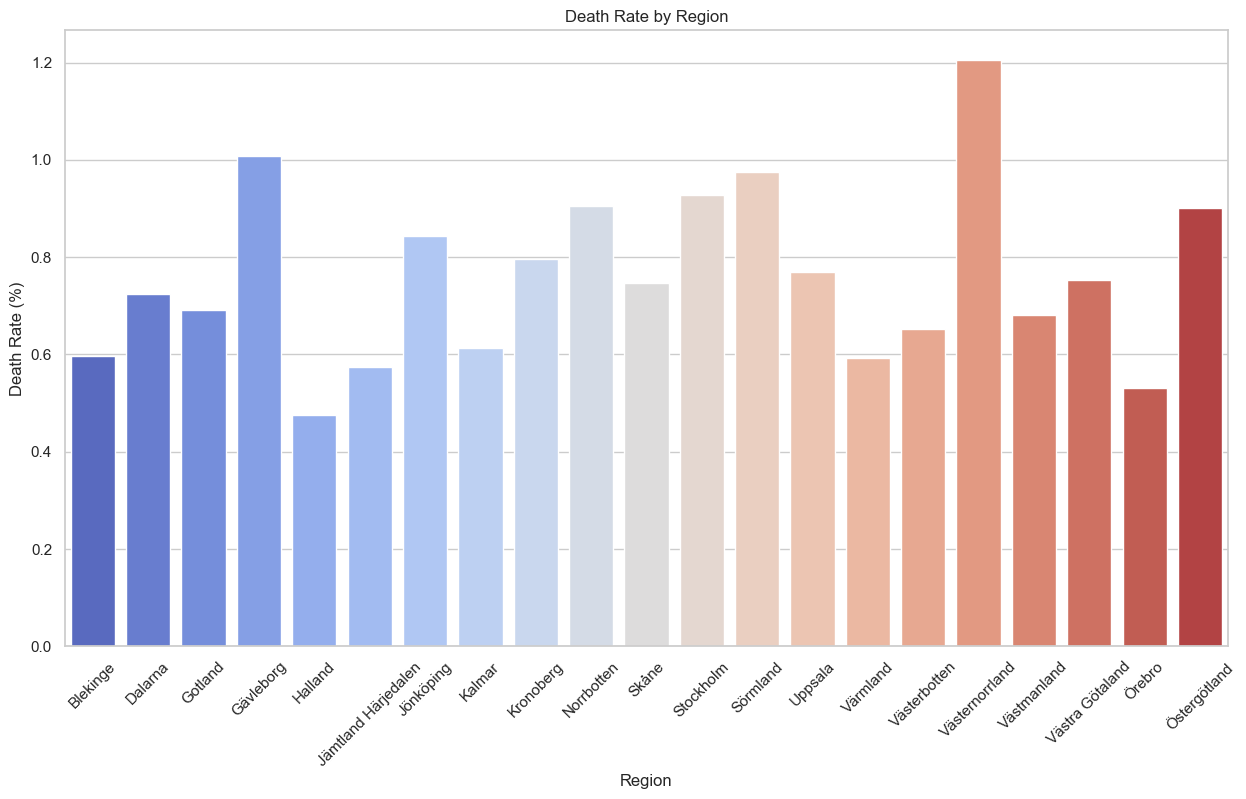

In [4]:
covid_each_region['Death_Rate'] = covid_each_region['Totalt_antal_avlidna'] / covid_each_region['Totalt_antal_fall'] * 100
covid_each_region['Sickness_Rate'] = covid_each_region['Fall_per_100000_inv'] / 10000

sns.set(style="whitegrid")

plt.figure(figsize=(15, 8))
sns.barplot(x='Region', y='Death_Rate', data=covid_each_region, palette="coolwarm")
plt.title('Death Rate by Region')
plt.xticks(rotation=45)
plt.ylabel('Death Rate (%)')
plt.xlabel('Region')

plt.savefig("../Data/Visualizeringar/Death_rate_by_region.png")

plt.show()


## mortallity rate between region

This graph highlights the disparities in COVID-19 death rates among various regions, with Västernorrland standing out as the most heavily affected

C:\Users\Kevin\AppData\Local\Temp\ipykernel_17400\2369899314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sickness_Rate', data=covid_each_region, palette="viridis")


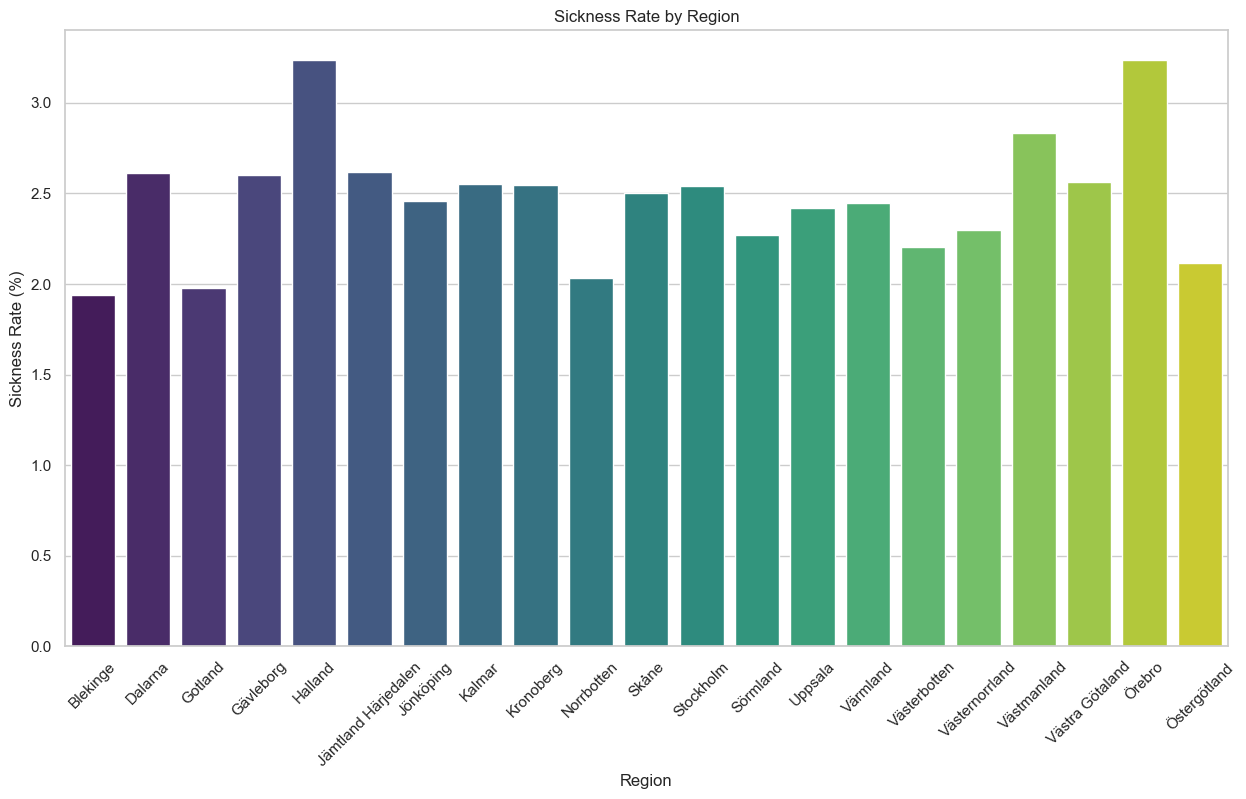

In [5]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Region', y='Sickness_Rate', data=covid_each_region, palette="viridis")
plt.title('Sickness Rate by Region')
plt.xticks(rotation=45)
plt.ylabel('Sickness Rate (%)')
plt.xlabel('Region')

plt.savefig("../Data/Visualizeringar/Sicknes_rate_by_region.png")

plt.show()

## Regional Sickness Rates in Sweden

The sickness rates vary between regions in Sweden, with Halland and Örebro experiencing some of the highest rates. However, it's worth noting that nearly all regions in Sweden had significant sickness rates during this period, which may lead to questions about the extent of testing among those who were feeling unwell

## Comparing Infection and Mortality Rates Across Swedish Regions

When comparing the graph between them we can see, significant differences emerge. Halland had one of the highest infection rates in Sweden but the lowest mortality rate, while Västernorrland, despite having the highest number of deaths by far, did not have as many sick people compared to other regions. This difference may be attributed to factors such as the presence of a larger elderly population, who are at a higher risk of mortality